# Numpy e sua relação com a matemática

Como importar a biblioteca *numpy* 

In [2]:
import numpy as np

Existem diversas funções já definidas na biblioteca, as mais comuns são *sin*, *cos*, *exp*, *sinh*, etc

In [3]:
np.sin(0)

0.0

In [4]:
np.cos(0)

1.0

Existem também alguns números bem conhecidos como o *pi* e a constante de euler *e*

In [5]:
np.pi

3.141592653589793

In [6]:
format(np.pi, '.20f')

'3.14159265358979311600'

In [7]:
np.e

2.718281828459045

In [8]:
np.exp(1)

2.718281828459045

In [9]:
np.exp(1) == np.e

True

e até o infinito *inf*

In [11]:
np.inf

inf

In [12]:
1.0/np.inf

0.0

## Objetos do tipo *lista*

In [12]:
l = [0,1,2]

In [15]:
l[1]

1

In [16]:
l+2

TypeError: can only concatenate list (not "int") to list

In [22]:
m = [10,11,12]

In [23]:
l+m

[0, 1, 2, 10, 11, 12]

# Objetos do tipo *array*

In [14]:
v = np.array([0,1,2])

In [15]:
v[0]

0

In [16]:
v+2

array([2, 3, 4])

In [17]:
u = np.array([10,11,12])

## Soma de arrays 

In [21]:
v+u

array([10, 12, 14])

## Concatenando arrays 

In [24]:
np.concatenate((v,u))

array([ 0,  1,  2, 10, 11, 12])

## Multiplicação de arrays

In [26]:
u*v

array([ 0, 11, 24])

## Potência de arrays?!

In [18]:
u**2

array([100, 121, 144])

In [19]:
u**v

array([  1,  11, 144])

## Produto escalar

In [30]:
u@v

35

`vdot` é só para arrays 1D

In [21]:
np.vdot(u,v)

35

`dot` serve para qualquer produto entre arrays

In [20]:
np.dot(u,v)

35

# Criando uma matriz, *array 2D*

In [25]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

## Elementos da matriz

In [39]:
A[0,0]

1

In [40]:
A[1,2]

6

## Linhas da matriz

In [42]:
A[1,:]

array([4, 5, 6])

## Colunas da matriz

In [43]:
A[:,2]

array([3, 6, 9])

## Produto com vetores

In [96]:
A@v

array([ 8, 17, 26])

In [45]:
np.dot(A,v)

array([ 8, 17, 26])

In [46]:
A[2,:]@v

26

In [106]:
def dot_from_for(Matrix,vector):
    aux = np.zeros_like(vector)
    Nrow, Ncol = Matrix.shape
    for i in range(Nrow):
        for j in range(Ncol):
            aux[i] += Matrix[i,j]*v[j]
    return aux

In [98]:
dot_from_for(A,v)

array([ 8, 17, 26])

In [103]:
%timeit -n 100000 A@v

650 ns ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [104]:
%timeit -n 100000 np.dot(A,v)

812 ns ± 35.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [105]:
%timeit -n 100000 dot_from_for(A,v)

6.03 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Using numba (Pre-compilation)

In [ ]:
pip install numba

In [117]:
from numba import jit

@jit
def dot_from_for_jitted(Matrix,vector):
    aux = np.zeros_like(vector)
    Nrow, Ncol = Matrix.shape
    for i in range(Nrow):
        for j in range(Ncol):
            aux[i] += Matrix[i,j]*v[j]
    return aux

In [118]:
%timeit -n 100000 dot_from_for_jitted(A,v)

837 ns ± 312 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Produto direto 

In [119]:
B = np.diag(np.ones(3))

In [120]:
B

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [121]:
A@B

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [122]:
np.tensordot(A,B)

array(15.)

## Matriz transposta

In [131]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [132]:
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## Determinante de Matriz

In [128]:
C = np.array([[4,1,1],
             [5,2,3],
             [6,3,2]])

In [129]:
np.linalg.det(C)

-8.999999999999998

## Matriz inversa

In [130]:
np.linalg.inv(C)

array([[ 0.55555556, -0.11111111, -0.11111111],
       [-0.88888889, -0.22222222,  0.77777778],
       [-0.33333333,  0.66666667, -0.33333333]])

## Diversas formas de inicializar arrays usando Numpy

np.array(), np.zeros(), np.ones(), np.empty(), np.arange(), np.linspace(),

In [34]:
v = np.array([0,1,2])
v

array([0, 1, 2])

In [35]:
v0 = np.zeros(3)
v0

array([0., 0., 0.])

In [36]:
v1 = np.ones(3)
v1

array([1., 1., 1.])

In [49]:
ve = np.empty(100000000000)
ve

array([4.63835946e-310, 0.00000000e+000, 4.63935885e-310, 4.63935886e-310,
       2.37151510e-322])

In [41]:
va = np.arange(2,9,1)
va

array([2, 3, 4, 5, 6, 7, 8])

In [45]:
vl = np.linspace(0,9,10)
vl

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [46]:
va.size

7

In [47]:
vl.size

10

In [50]:
b = vl.reshape(5, 2)

In [51]:
b

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]])

# Informação de vetores

In [48]:
v

array([0, 1, 2])

In [50]:
v.sum()

3

In [51]:
v.max()

2

In [52]:
v.min()

0

In [53]:
v.mean()

1.0

In [54]:
v.std()

0.816496580927726

# Números aleatórios

## 4.1 Números entre [0,1)

In [72]:
va = np.random.random(100)

In [73]:
va

array([0.5519282 , 0.58672126, 0.36938778, 0.22351734, 0.13030226,
       0.07179563, 0.05430101, 0.27025788, 0.36461965, 0.82697201,
       0.9897557 , 0.89359251, 0.35051235, 0.30073819, 0.87469054,
       0.11820799, 0.7216696 , 0.8810673 , 0.67879384, 0.05033944,
       0.30491928, 0.8881771 , 0.81248908, 0.33212348, 0.45181054,
       0.76489715, 0.02454443, 0.06336129, 0.60740507, 0.19304015,
       0.94184579, 0.95581859, 0.18739166, 0.08338017, 0.72588073,
       0.68614638, 0.95238485, 0.86897502, 0.92574306, 0.68729968,
       0.26306658, 0.04189451, 0.98057788, 0.75019662, 0.810334  ,
       0.93151845, 0.11846711, 0.8446448 , 0.69412088, 0.67004557,
       0.8102871 , 0.64569583, 0.48604498, 0.83179619, 0.80774977,
       0.91646116, 0.86306193, 0.62149061, 0.31248423, 0.12591837,
       0.3265625 , 0.80251872, 0.79165608, 0.07710639, 0.5269376 ,
       0.24661373, 0.19377691, 0.36369517, 0.79467107, 0.96331718,
       0.75635527, 0.49036035, 0.65706112, 0.43382749, 0.72126

In [74]:
va = np.random.rand(100)

In [75]:
va

array([0.24768988, 0.33044386, 0.01341118, 0.28280869, 0.55507915,
       0.99838584, 0.54545897, 0.42551382, 0.54197386, 0.53475034,
       0.68263857, 0.0331347 , 0.32016487, 0.16312786, 0.02009622,
       0.40825982, 0.75994971, 0.09962182, 0.47688508, 0.22295802,
       0.60234249, 0.63968212, 0.43455032, 0.2508488 , 0.33351243,
       0.88527786, 0.86867499, 0.28637318, 0.4748449 , 0.88343022,
       0.92165726, 0.48142075, 0.22301981, 0.60857531, 0.65449222,
       0.19324708, 0.10366599, 0.19441313, 0.54713148, 0.78706896,
       0.30834057, 0.41014062, 0.6115207 , 0.24466629, 0.73849044,
       0.29196896, 0.53771559, 0.02328305, 0.00878894, 0.66037492,
       0.10871094, 0.82931308, 0.16599428, 0.16199052, 0.76433525,
       0.0400201 , 0.58425207, 0.26796249, 0.21485701, 0.66125884,
       0.60562511, 0.47879061, 0.49556045, 0.72819318, 0.50876889,
       0.84018667, 0.81237736, 0.72285721, 0.41610491, 0.44459873,
       0.86449293, 0.2096859 , 0.17271425, 0.13107601, 0.37228

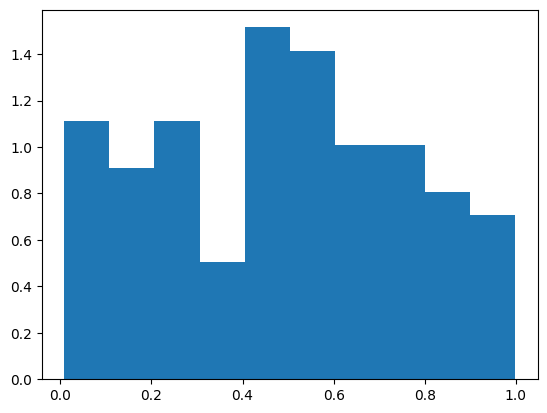

In [77]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(va, 10, density=True)
plt.show()

## 4.2 Números distribuídos gaussianamente

`sigma * np.random.randn(...) + mu`

In [78]:
vgauss = np.random.randn(100)

In [79]:
vgauss

array([ 1.10920883,  1.33049079, -1.52964806, -0.73683387,  0.7068037 ,
        1.2297109 ,  0.60038563, -0.0350829 ,  1.31461567,  0.78183876,
        0.02647743,  0.74860156, -0.1811775 , -0.54416819, -0.0381411 ,
        0.2249712 ,  1.41317614,  0.49208203,  0.29358331,  0.18727193,
        0.83671212,  1.29553584, -0.48185081,  0.77296792, -0.59772224,
        1.41898848,  1.61846695, -0.72631577,  0.34333752, -0.08350228,
        0.7063465 , -0.25186642, -0.70769205,  1.15655585,  0.08573183,
       -1.41232827,  0.46660692, -1.82335331,  0.87812787, -1.18387858,
       -1.12858574, -1.04797149,  0.43736162, -0.50461606,  0.57637931,
        3.33861413,  0.89600171, -0.82120692,  0.05899589, -1.6020591 ,
        0.80405561,  1.16919353,  0.47598074, -1.88565459, -0.29193173,
       -1.17556984,  0.29828081,  0.84223111,  0.35019108,  0.05961876,
       -0.39100894,  0.99503003,  1.32332269,  0.67087702, -0.81081046,
        0.85599451, -0.22835736, -1.75086845,  0.98419204, -0.38

In [80]:
vgauss[vgauss>0].size

56

In [81]:
vgauss[vgauss<0].size

44

`random.normal(loc=0.0, scale=1.0, size=None)`

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [84]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

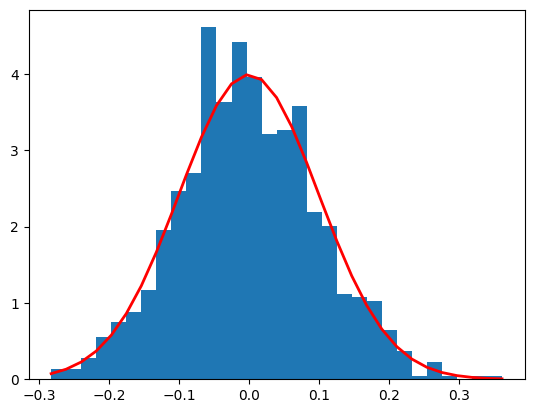

In [85]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [86]:
s.mean()

-0.0005400729942258695

In [87]:
s.std()

0.09865696114778508